In [482]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from imblearn.over_sampling import SMOTE
from numpy.random import uniform

In [483]:
# Load the dataset
file_path = "../../data/dynamic_supply_chain_logistics_dataset.csv"
df = pd.read_csv(file_path)

df.drop(columns=['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude'], inplace=True)
df.head()

,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,port_congestion_level,shipping_costs,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,0.359066,4.289160,456.503853,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,0.230660,7.018373,640.408205,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,0.027210,9.605064,155.749314,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,0.616619,8.899616,104.317961,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,0.952385,0.061760,977.222528,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [484]:
# Cleaning Data
numerical_list = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_list)

['fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'delivery_time_deviation']


In [485]:
#Removal of outlier:

df1 = df.copy()

for i in numerical_list:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
# display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))
df = df1.copy()
df.head()


Inference:
Before removal of outliers, The dataset had 32065 samples.
After removal of outliers, The dataset now has 25245 samples.


,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,port_congestion_level,shipping_costs,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,0.359066,4.289160,456.503853,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,0.230660,7.018373,640.408205,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,0.027210,9.605064,155.749314,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,0.616619,8.899616,104.317961,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,0.952385,0.061760,977.222528,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [486]:
df['risk_classification'].value_counts()

risk_classification
High Risk        20451
Moderate Risk     4277
Low Risk           517
Name: count, dtype: int64

In [487]:
# Label encoding

label_encoder = LabelEncoder()
df['risk_classification'] = label_encoder.fit_transform(df['risk_classification'])

In [488]:
df['risk_classification'].value_counts()

risk_classification
0    20451
2     4277
1      517
Name: count, dtype: int64

                                       Correlation Matrix                                       


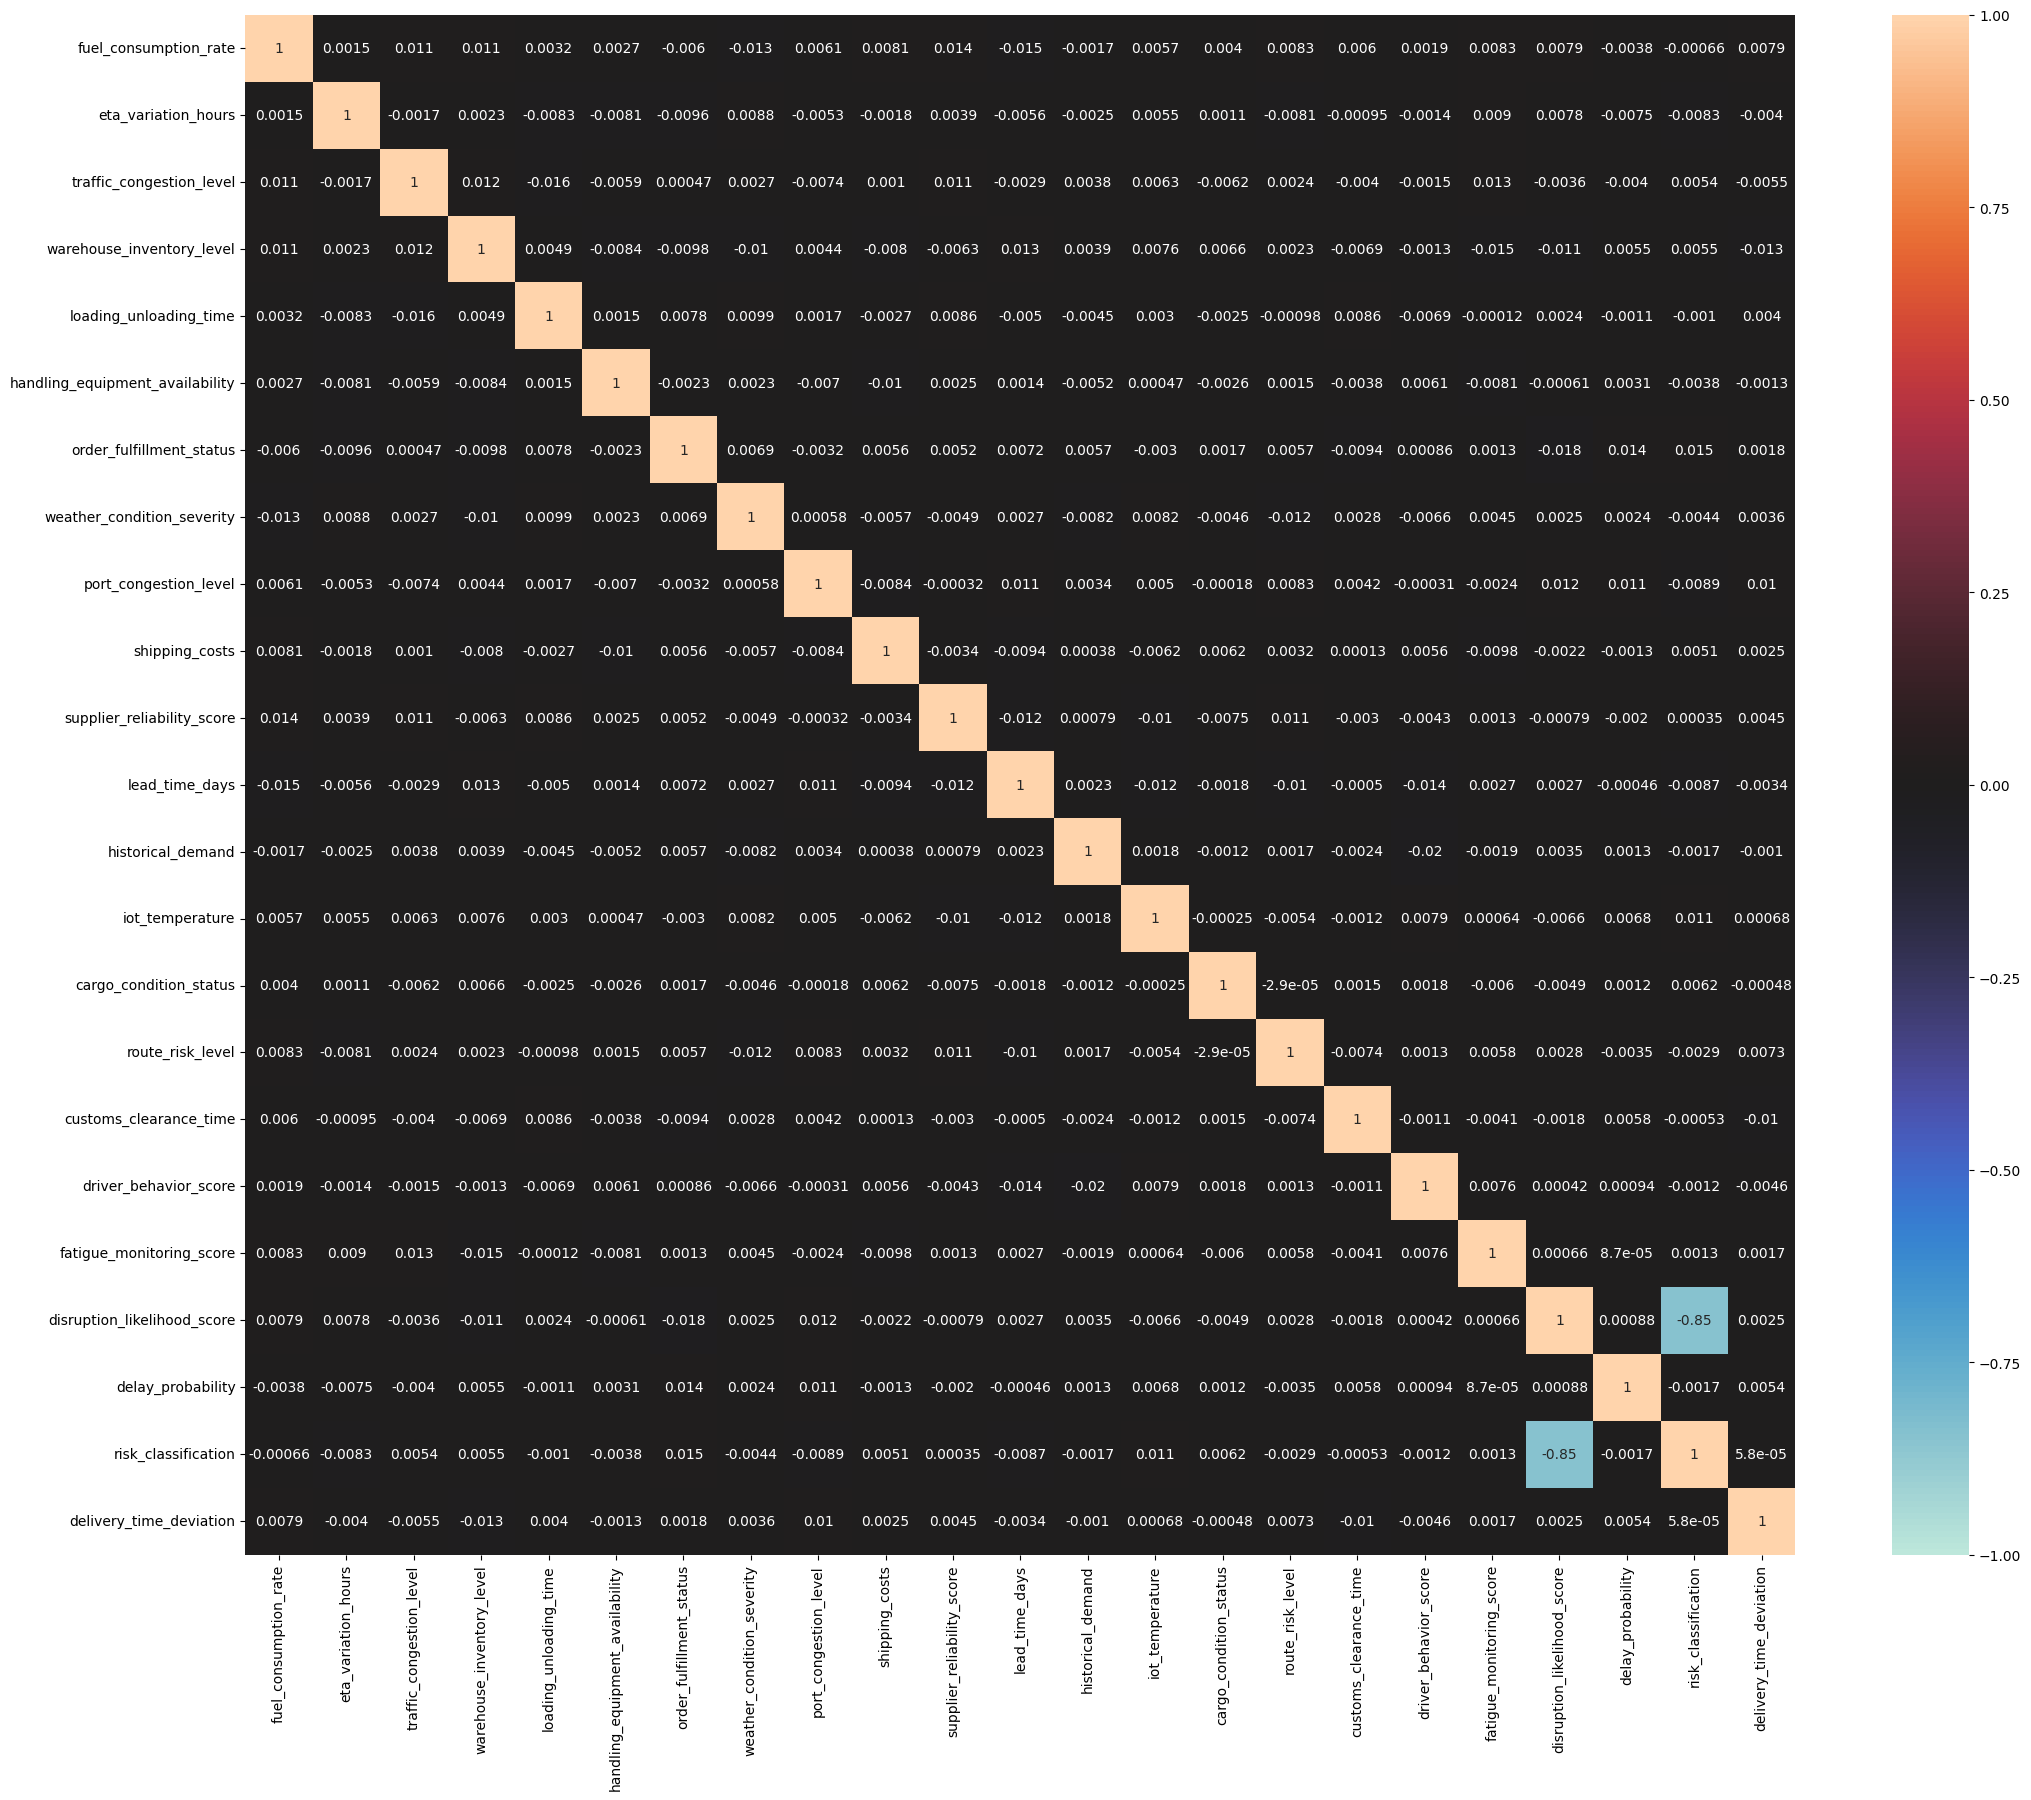

In [489]:
# check correlation
# calculate correlation between each numerical feature and the encoded risk_classification

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

risk_classification
0    500
2    500
1    500
Name: count, dtype: int64


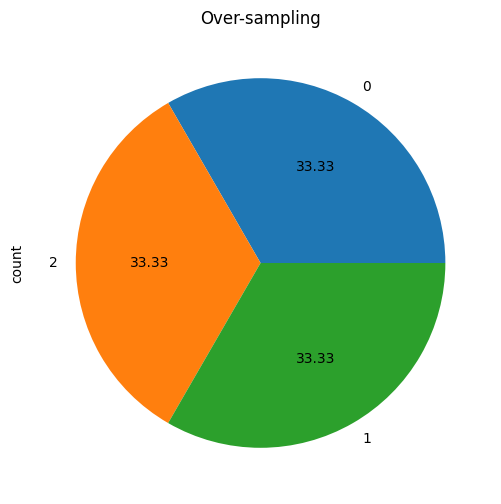

In [ ]:
# Step 1: Randomly select 500 samples from class 0 and class 2
df_0 = df[df["risk_classification"] == 0].sample(n=500, random_state=42)

df_1 = df[df["risk_classification"] == 1].sample(n=500, random_state=42)

df_2 = df[df["risk_classification"] == 2].sample(n=500, random_state=42)

# Step 2: Combine the selected data
df_balanced = pd.concat([df_0, df_2, df_1], axis=0)

# Step 3: Split into features and target variable
X = df_balanced.drop(columns=["risk_classification"])
Y = df_balanced["risk_classification"]

# Step 4: Visualize the new class distribution
ax = Y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

print(Y.value_counts())

In [491]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)

In [492]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([7.64899783e-03, 8.31749339e-03, 4.57465123e-02, 0.00000000e+00,
       0.00000000e+00, 6.77542430e-03, 0.00000000e+00, 0.00000000e+00,
       6.00084999e-04, 0.00000000e+00, 0.00000000e+00, 1.35010473e-02,
       0.00000000e+00, 0.00000000e+00, 2.00858325e-02, 0.00000000e+00,
       5.63701159e-03, 0.00000000e+00, 0.00000000e+00, 1.09558351e+00,
       7.44008724e-02, 1.76996432e-02])

In [493]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

disruption_likelihood_score        1.095584
delay_probability                  0.074401
traffic_congestion_level           0.045747
cargo_condition_status             0.020086
delivery_time_deviation            0.017700
lead_time_days                     0.013501
eta_variation_hours                0.008317
fuel_consumption_rate              0.007649
handling_equipment_availability    0.006775
customs_clearance_time             0.005637
port_congestion_level              0.000600
warehouse_inventory_level          0.000000
loading_unloading_time             0.000000
weather_condition_severity         0.000000
iot_temperature                    0.000000
historical_demand                  0.000000
supplier_reliability_score         0.000000
shipping_costs                     0.000000
order_fulfillment_status           0.000000
route_risk_level                   0.000000
driver_behavior_score              0.000000
fatigue_monitoring_score           0.000000
dtype: float64

<Axes: >

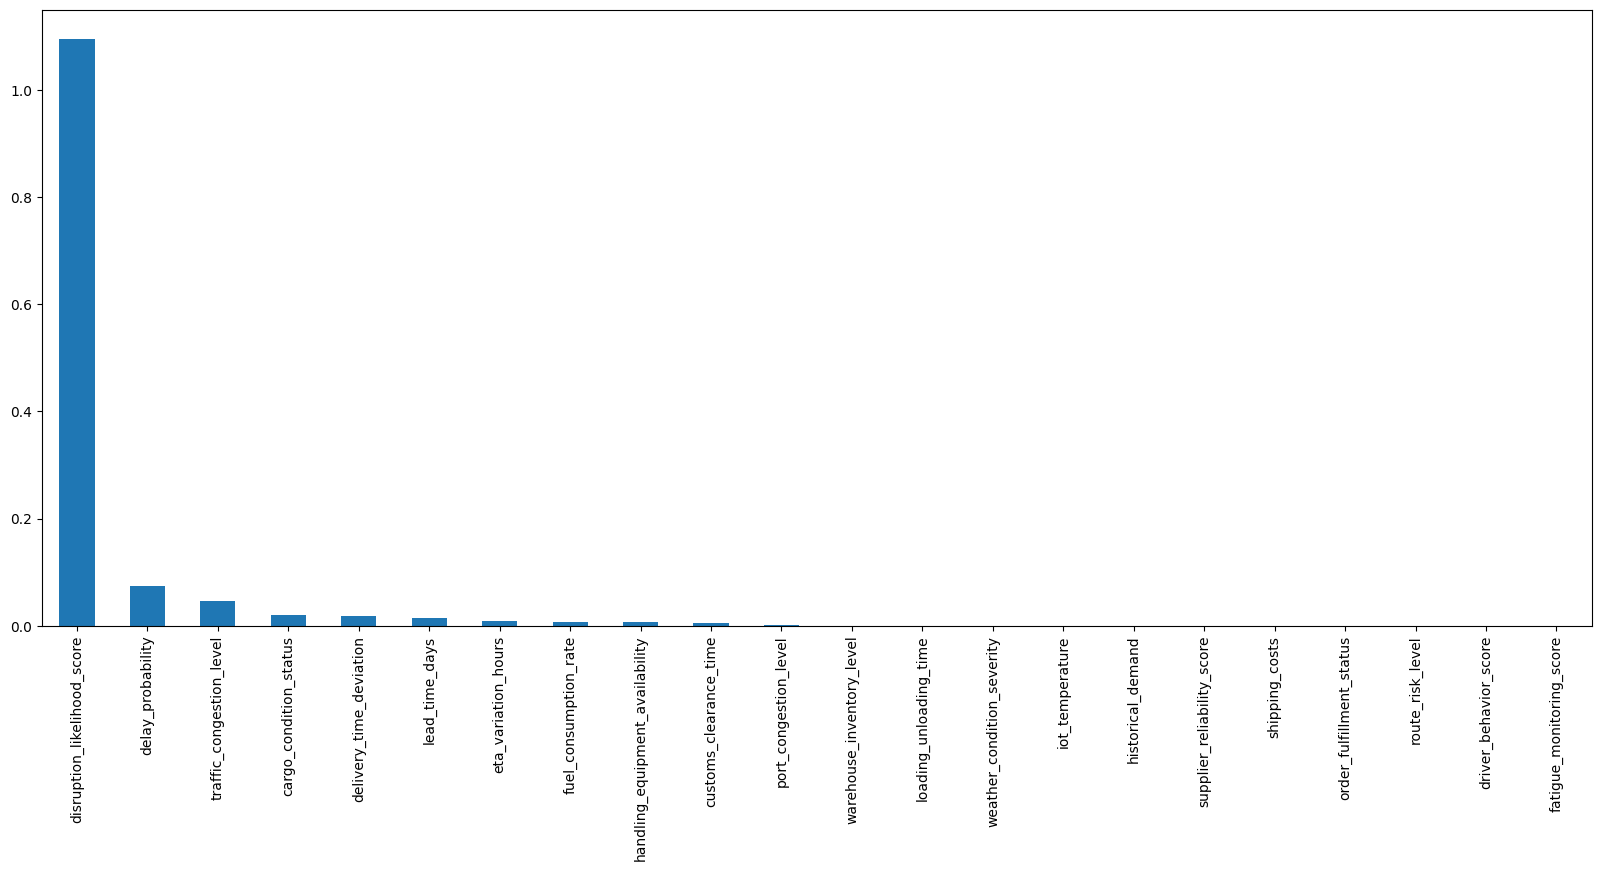

In [494]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

#No we Will select the  top 2 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=2)
sel_five_cols.fit(X_train, y_train)
selected_feature = X_train.columns[sel_five_cols.get_support()]
print(f"Top 2 Feature: {selected_feature}")

Top 2 Feature: Index(['disruption_likelihood_score', 'delay_probability'], dtype='object')


In [496]:
X_train = X_train[selected_feature]
X_test = X_test[selected_feature]

X_train

,disruption_likelihood_score,delay_probability
1614,0.540786,0.168796
21560,0.241452,0.425789
15850,0.254918,0.999648
20241,0.286979,0.961731
17707,0.927614,0.828882
...,...,...
21729,0.270518,0.096219
18525,0.259036,0.816522
24193,0.340046,0.048178
24873,0.264756,0.812642


In [497]:
y_train.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)

# Transform data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_temp_idx = []

print("before filter sample: ")
print(X_train_scaled.shape)
print(y_train.shape)

arr = y_train.values
for i in range(len(arr)):
    if arr[i] == 0:
        if X_train_scaled[i][0] > 0.75:
            X_train_scaled_temp_idx.append(i)
    if arr[i] == 1:
        if True:
            X_train_scaled_temp_idx.append(i)
    if arr[i] == 2:
        if X_train_scaled[i][0] > 0.25 and X_train_scaled[i][0] < 0.7:
            X_train_scaled_temp_idx.append(i)

X_train_scaled_temp_idx = np.array(X_train_scaled_temp_idx)

# keep only sample that pass specific threshold
X_train_scaled = X_train_scaled[X_train_scaled_temp_idx]
y_train = y_train[X_train_scaled_temp_idx]
print("after filter sample: ")
print(X_train_scaled.shape)
print(y_train.shape)

before filter sample: 
(1125, 2)
(1125,)
after filter sample: 
(994, 2)
(994,)


In [498]:
# y_train = y_train.iloc[X_train_scaled_temp_idx]
# y_train

y_train.value_counts()

risk_classification
1    365
0    342
2    287
Name: count, dtype: int64

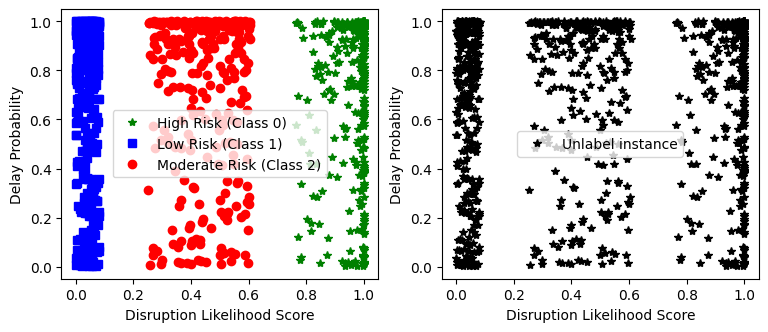

In [499]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121,)
plt.plot(X_train_scaled[y_train==0,0], X_train_scaled[y_train==0,1], "g*", label="High Risk (Class 0)")
plt.plot(X_train_scaled[y_train==1,0], X_train_scaled[y_train==1,1], "bs", label="Low Risk (Class 1)")
plt.plot(X_train_scaled[y_train==2,0], X_train_scaled[y_train==2,1], "ro", label="Moderate Risk (Class 2)")
plt.ylabel("Delay Probability", fontsize=10)
plt.xlabel("Disruption Likelihood Score", fontsize=10)
plt.legend(fontsize=10)
plt.subplot(122,)
plt.plot(X_train_scaled[:,0], X_train_scaled[:,1], "k*", label="Unlabel instance")
plt.ylabel("Delay Probability", fontsize=10)
plt.xlabel("Disruption Likelihood Score", fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [500]:
import numpy as np
import matplotlib.pyplot as plt

class Kmean_From_Scratch:
    def __init__(self):
        self.centroids = []
    
    def euclidean(self, point, centroid):
        return np.sqrt(np.sum((point - centroid) ** 2))

    def initialize_centroids_randomly(self, X, y, n_clusters):
        unique_classes = np.unique(y)
        centroids = []

        for cls in unique_classes[:n_clusters]:  # Ensure we do not exceed `n_clusters`
            class_samples = X[y == cls]
            random_idx = np.random.randint(len(class_samples))  # Select a random index
            centroids.append(class_samples[random_idx])  # Random centroid from the class

        if len(centroids) < n_clusters:  # If there are fewer unique classes than clusters
            remaining = n_clusters - len(centroids)
            extra_centroids = X[np.random.choice(len(X), remaining, replace=False)]
            centroids.extend(extra_centroids)

        return np.array(centroids)

    def showplotwithclass(self, sorted_x, centroids):
        plt.figure(figsize=(9, 3.5))
        colors = plt.cm.tab20.colors

        for i, cluster_points in enumerate(sorted_x):
            if len(cluster_points) == 0:  # Skip empty clusters
                continue
            cluster_points = np.array(cluster_points)
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                        color=colors[i % len(colors)], label=f"Cluster {i}")

        plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], 
                    c='black', marker='+', s=100, label="Centroids")

        plt.ylabel("Delay Probability", fontsize=10)
        plt.xlabel("Disruption Likelihood Score", fontsize=10)
        plt.legend(fontsize=10)
        plt.show()

    def calculateClass(self, X, centroids, n_clusters):
        sorted_x = [[] for _ in range(n_clusters)]  # Independent lists
        for x in X:
            dists = [self.euclidean(x, centroid) for centroid in centroids]
            centroid_idx = np.argmin(dists)
            sorted_x[centroid_idx].append(x)

        sorted_x = [np.array(cluster) for cluster in sorted_x if len(cluster) > 0]

        self.showplotwithclass(sorted_x, centroids)
        return sorted_x

    def adjustCentroid(self, sorted_x, centroids):
        prev_centroids = np.array(centroids)  # Preserve old centroids
        new_centroids = []

        for i, cluster in enumerate(sorted_x):
            if len(cluster) == 0:
                new_centroids.append(prev_centroids[i])  # Keep old centroid if cluster is empty
            else:
                new_centroids.append(np.mean(cluster, axis=0))

        return np.array(new_centroids)

    def train(self, X, y, n_clusters, perturbation_factor=0.03):
        # Randomly initialize centroids instead of using class mean
        centroids = self.initialize_centroids_randomly(X, y, n_clusters)

        # Perturb the centroids slightly for randomness
        centroids += np.random.randn(*centroids.shape) * perturbation_factor
        
        self.centroids = centroids
        
        while True:
            sorted_x = self.calculateClass(X, self.centroids, n_clusters)  # Assign points to centroids
            new_centroid = self.adjustCentroid(sorted_x, self.centroids)  # Update centroids
            
            # Check if centroids have stabilized (converged)
            if np.allclose(self.centroids, new_centroid):
                break
            
            self.centroids = new_centroid  # Update centroids with the new ones

        return self.centroids  # Return the final centroids

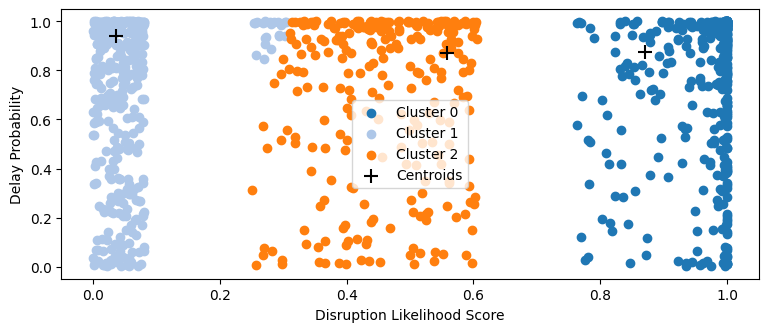

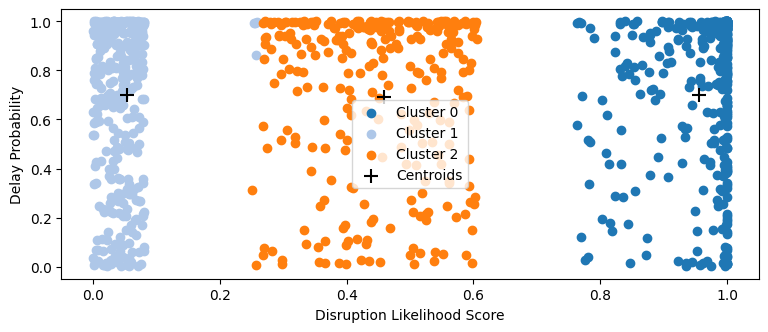

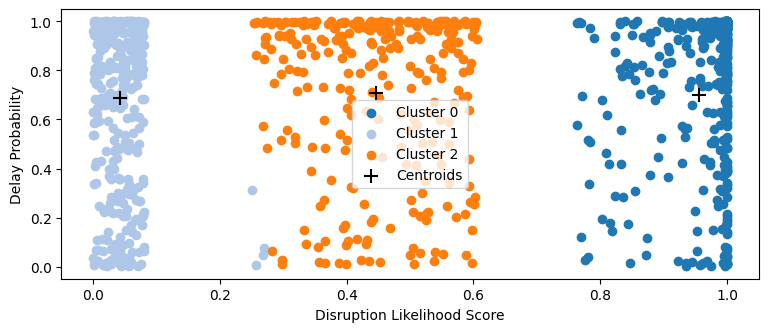

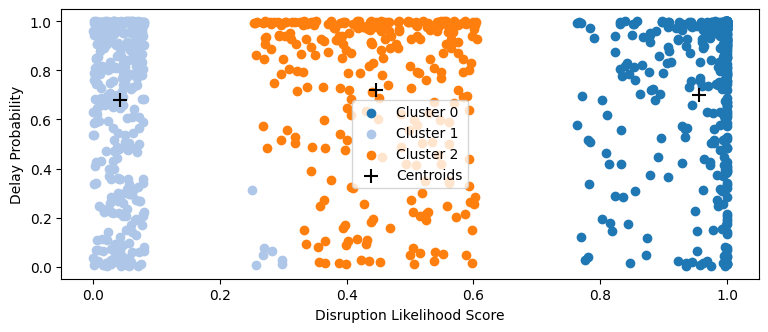

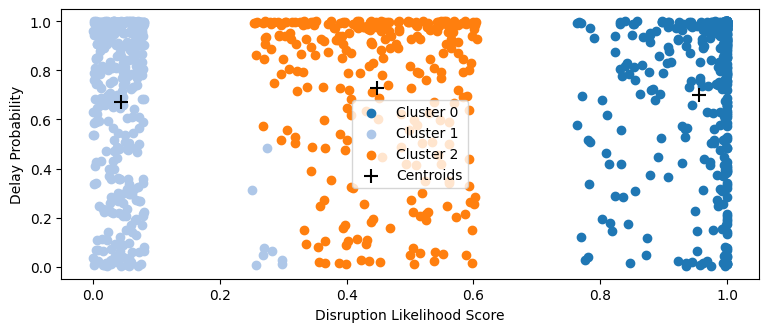

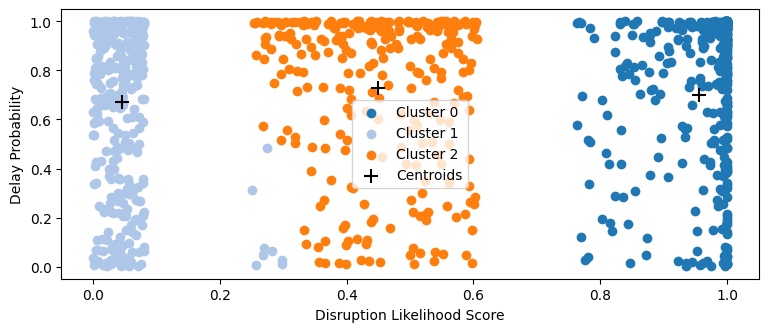

['model_kmean.joblib']

In [501]:
import joblib
kmean = Kmean_From_Scratch()

kmean.train(X_train_scaled, y_train, 3)

joblib.dump(kmean, 'model_kmean.joblib')